# Final Project Report

* Class: DS 5100
* Student Name: Rachel Holman
* Student Net ID: dnw9qk
* This URL: [a URL to the notebook source of this document](https://github.com/rachel-holman/dnw9qk_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb)

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import pandas as pd
import numpy as np
import random

class Die:
    """
    Allows user to create a die, specify side-weights, randomly roll
    the die, and view the die.
    """
    
    def __init__(self, faces=np.arange(1,7)):
        """
        Creates a die with faces in the NumPy array list of faces 
        given by the user. Defaults to a 6-sided standard die with 
        face values 1-6 each with equal weight 1.0. The faces must 
        be distinct strings or numbers or the same data type.
        
        Parameters: 
        faces - Numpy Array of strings or numbers
        
        Returns:
        N/A
        """
        if len(set(faces)) != len(faces):
            raise ValueError("Face values must be distinct")
        
        if not isinstance(faces, np.ndarray):
            raise TypeError("Input must be a NumPy array")
            
        self._die = pd.DataFrame(dict(face = faces,
                                     weight = np.ones(len(faces), 
                                                      dtype=float)))
        self._die = self._die.set_index('face')
        self.faces = faces
        
        
    def change_side_weight(self, side, weight):
        """
        Allows user to change the weight value for a specific side
        of the dice. Takes a valid side from die and a weight value that
        is either an integer, float, or value that can be cast as an 
        integer.
        
        Parameters: 
        side - string or number value in the Die face array
        weight - numeric value
        
        Returns:
        N/A
        """
        if side not in self.faces:
            raise IndexError("Face value must be in the die array")
            
        if not (type(weight) == int or type(weight) == float):
            if not weight.isnumeric():
                raise TypeError("Weight value must be numeric")
        
        weight = int(weight)
        self._die.loc[side, 'weight'] = weight
        
    def roll_die(self, rolls=1):
        """
        Takes a random sample with replacement from the private die
        data frame and applies the weight values. Returns a list of
        outcomes. Only one roll by default.
        
        Parameters: 
        rolls - integer value
        
        Returns:
        list of random outcomes for each roll
        """
        rolled = random.choices(self._die.index, 
                                weights=self._die.weight, 
                                k=rolls)
        return rolled
        
    def current_state(self):
        """
        Returns a copy of the private die data frame
        
        Parameters: 
        N/A
        
        Returns:
        copy of data frame
        """
        return self._die.copy()

    
class Game:
    """
    Takes a list of dice and allows user to roll them all and see
    the results.
    """
    
    def __init__(self, dice):
        """
        Initialized a list of similar dice.
        We assume the dice in the list each have the same number of sides
        and associated faces, but each may have their own weights. 
        
        Parameters: 
        dice - list of Die objects
        
        Returns:
        N/A
        """
        self.dice = dice
        
        
    def play(self, rolls=1):
        """
        Rolls each dice a specified number of times (default 1) and saves
        the output in a private wide-form table with roll number as a 
        named index, columns for each die number (using its list index 
        as column name), and the face rolled in the instance in each cell
        
        Parameters: 
        rolls - integer value
        
        Returns:
        N/A
        """
        self._game = pd.DataFrame({'roll': np.arange(1,rolls+1)})
        self._game = self._game.set_index('roll')
        
        col = 1
        for d in self.dice:
            self._game[col] = random.choices(d.current_state().index, 
                                           weights=d.current_state().weight, 
                                           k=rolls)
            col += 1
        
        
    def show_results(self, form="wide"):
        """
        Returns a copy of the private play data frame to the user.
        User is allowed to specify whether they want to see the output
        in narrow or wide form (wide by default). 
        A ValueError is raised if the user enters an invalid viewing option.
        Narrow form will have a MultiIndex comprising of roll number and 
        die number (in this order) and a single column with faces roled.
        
        Parameters: 
        form - string value of either "wide" or "narrow"
        
        Returns:
        either a wide or narrow data frame
        """
        if not (form.lower() == 'wide' or form.lower() == 'narrow'):
            raise ValueError("Invalid option for narrow or wide output")
        
        cols = list(1+np.arange(len(self._game.reset_index().columns)-1))
        narrow = pd.melt(self._game.reset_index(), 
                         id_vars=['roll'], 
                         value_vars=cols).rename({'variable':'die',
                                                  'value':'outcome'}, 
                                                 axis=1)
        narrow = narrow.set_index(['roll','die']).sort_index()
        
        if form.lower() == 'wide':
            return self._game.copy()
        else:
            return narrow
            
            
    
class Analyzer:
    """
    Analyzes the oucome of a given game in terns of jackpot rolls,
    value counts for each face, counts for each combination of faces
    rolled, and counts for each permutation of faces rolled.
    """
    
    def __init__(self, game):
        """
        Initializes the game value so long as it is an instance of 
        the Game object
        
        Parameters: 
        game - Game object of game that has been played 
        
        Returns:
        N/A
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object")
            
        self.game = game
        
        
    def jackpot(self):
        """
        A jackpot is a result in which all faces are the same for one roll.
        This method computes and returns the total number of jackpots 
        in the game.
        
        Parameters: 
        N/A
        
        Returns:
        total number of jackpots
        """
        jack = np.transpose(self.game.show_results())
        
        jackpots = 0
        for c in jack.columns:
            if len(np.unique(jack[[c]])) == 1:
                jackpots = jackpots + 1

        return jackpots
        
    def face_counts(self):
        """
        This method computes the number of times a given face is rolled
        in each roll event and returns a data frame with an index of
        roll number, face values as columns, and count values in the cells.
        
        Parameters: 
        N/A
        
        Returns:
        data frame with roll number, face values, and count values
        """
        base = pd.DataFrame({'roll': self.game.show_results().index})
        base = base.set_index('roll')
        
        for d in self.game.dice:
            for i in d.current_state().index :
                base[i] = np.zeros(len(base),dtype=float)
        
        nums = pd.DataFrame(self.game.show_results('narrow')\
                            .groupby(['roll','outcome']).size())\
                            .rename({0:'count'},axis=1).reset_index()
        nums = pd.pivot_table(nums, 
                               values='count',
                               index='roll',
                               columns='outcome')
        counts = base + nums
        return counts.fillna(0)
        
        
    def combo_count(self):
        """
        Computes the distinct combinations of faces rolled along with their
        counts. Combinations are order-independent and may contain repetitions.
        Returns a dataframe with a MultiIndex of distinct combinations 
        and a column for associated counts
        
        Parameters: 
        N/A
        
        Returns:
        data frame with distinct combinations and counts
        """
        df = self.game.show_results('wide')
        
        combo = pd.DataFrame(np.sort(df.values, axis=1), columns=df.columns)\
            .value_counts(sort=False).to_frame().rename({0:'count'}, axis=1)
       
        return combo
    
    def permutation_count(self):
        """
        Computes the distinct permitation of faces rolled along with their
        counts. Permutations are order-dependent and may contain repetitions.
        Returns a dataframe with a MultiIndex of distinct permutations 
        and a column for associated counts
        
        Parameters: 
        N/A
        
        Returns:
        data frame with distinct permutations and counts
        """
        perm = self.game.show_results('wide').value_counts(sort=False)\
                .to_frame().rename({0:'count'},axis=1)
        return perm 
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import pandas as pd
import random
from pandas.testing import assert_frame_equal
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class DieTestSuite(unittest.TestCase):
    
    def test_init(self):
        test_die = Die()
        
        f=[1,2,3,4,5,6]
        w=[1.0,1.0,1.0,1.0,1.0,1.0]
        df = pd.DataFrame(dict(face = f, weight = w)).set_index('face')
        
        self.assertTrue(df.equals(test_die.current_state()))
        self.assertTrue(isinstance(test_die, Die))
    
    def test_change_side_weight(self):
        test_die = Die()
        test_die.change_side_weight(3, 5)
        
        f=[1,2,3,4,5,6]
        w=[1.0,1.0,5.0,1.0,1.0,1.0]
        df = pd.DataFrame(dict(face = f, weight = w)).set_index('face')
        
        self.assertEqual(df.equals(test_die.current_state()), True)
    
    
    def test_roll_die(self):
        random.seed(12345)
        test_die = Die()
        
        self.assertEqual(test_die.roll_die(5), [3, 1, 5, 2, 3])
        
        
    def test_current_state(self):
        test_die = Die()
        test_die.change_side_weight(1, 5)
        
        f=[1,2,3,4,5,6]
        w=[5.0,1.0,1.0,1.0,1.0,1.0]
        df = pd.DataFrame(dict(face = f, weight = w)).set_index('face')
        
        self.assertEqual(df.equals(test_die.current_state()), True)
        
    
class GameTestSuite(unittest.TestCase):
    
    def test_init(self):
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        
        self.assertTrue(all(isinstance(d, Die) for d in test_game.dice))
        self.assertTrue(isinstance(test_game, Game))
        
    def test_play(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(5)
        
        r = [1,2,3,4,5]
        d1= [3,1,5,2,3]
        d2= [2,3,2,2,3]
        df = pd.DataFrame(dict(roll=r, d1=d1, d2=d2))\
             .set_index('roll').rename({'d1':1, "d2":2}, axis=1)

        self.assertEqual(df.equals(test_game.show_results()), True)
        
    
    def test_show_results(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(5)
        
        r = [1,2,3,4,5]
        d1= [3,1,5,2,3]
        d2= [2,3,2,2,3]
        df = pd.DataFrame(dict(roll=r, d1=d1, d2=d2))\
             .set_index('roll').rename({'d1':1, "d2":2}, axis=1)

        self.assertEqual(df.equals(test_game.show_results()), True)
    
    
class AnalyzerTestSuite(unittest.TestCase):
    
    def test_init(self):
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(5)
        
        test_analyzer = Analyzer(test_game)
        
        self.assertTrue(isinstance(test_game, Game))
        self.assertTrue(isinstance(test_analyzer, Analyzer))
        
    def test_jackpot(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(5)
        
        test_analyzer = Analyzer(test_game)
        test_analyzer.jackpot()
        
        self.assertEqual(test_analyzer.jackpot(), 2)
        
    
    def test_face_counts(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(5)
        
        test_analyzer = Analyzer(test_game)
        
        r = [1,2,3,4,5]
        f1= [0.0,1.0,0.0,0.0,0.0]
        f2= [1.0,0.0,1.0,2.0,0.0]
        f3= [1.0,1.0,0.0,0.0,2.0]
        f4= [0.0,0.0,0.0,0.0,0.0]
        f5= [0.0,0.0,1.0,0.0,0.0]
        f6= [0.0,0.0,0.0,0.0,0.0]
        df = pd.DataFrame(dict(roll=r, f1=f1, f2=f2,
                              f3=f3,f4=f4,f5=f5,f6=f6))\
             .set_index('roll').rename({'f1':1, "f2":2,
                                        'f3':3, 'f4':4,
                                        'f5':5, 'f6':6}, axis=1)
        
        self.assertEqual(df.equals(test_analyzer.face_counts()), True)
    
    def test_combo_count(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(10)
        
        test_analyzer = Analyzer(test_game)
        
        d1 = [1,1,2,3,3,3,4]
        d2= [2,3,3,3,5,6,6]
        c= [2,2,2,1,1,1,1]
        df = pd.DataFrame(dict(d1=d1, d2=d2, count=c))\
             .rename({'d1':1, "d2":2}, axis=1).set_index([1,2])

        self.assertEqual(df.equals(test_analyzer.combo_count()), True)

    
    def test_permutation_count(self):
        random.seed(12345)
        test_die1 = Die()
        test_die2 = Die()
        test_die2.change_side_weight(3, 5)
        
        test_game = Game([test_die1, test_die2])
        test_game.play(10)
        
        test_analyzer = Analyzer(test_game)
        
        d1 = [1,1,2,2,3,3,3,4,5]
        d2= [2,3,1,3,2,3,6,6,3]
        c= [1,2,1,1,1,1,1,1,1]
        df = pd.DataFrame(dict(d1=d1, d2=d2, count=c))\
             .rename({'d1':1, "d2":2}, axis=1).set_index([1,2])
        
        self.assertEqual(df.equals(test_analyzer.permutation_count()), True)
    
    
    
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
    

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo as m

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(m)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Analyzes the oucome of a given game in terns of jackpot rolls,
     |  value counts for each face, counts for each combination of faces
     |  rolled, and counts for each permutation of faces rolled.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes the game value so long as it is an instance of 
     |      the Game object
     |      
     |      Parameters: 
     |      game - Game object of game that has been played 
     |      
     |      Returns:
     |      N/A
     |  
     |  combo_count(self)
     |      Computes the distinct combinations of faces rolled along with their
     |      counts. Combinations are order-independent and may contain repetitions.
     |      Returns a dataframe with a

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/rachel-holman/dnw9qk_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [3]:
!pip install -e .

Obtaining file:///Users/rachelholman/Desktop/MSDS/DS5100%20-%20DS%20Programming/dnw9qk_ds5100_montecarlo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlo
    Found existing installation: montecarlo 1.0
    Uninstalling montecarlo-1.0:
      Successfully uninstalled montecarlo-1.0
  Running setup.py develop for montecarlo


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
faircoin = m.Die(np.array(['H','T']))
unfaircoin = m.Die(np.array(['H','T']))
unfaircoin.change_side_weight('H', 5)

In [6]:
faircoin.current_state()

,weight
face,
H,1.0
T,1.0


In [7]:
unfaircoin.current_state()

,weight
face,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
fairgame = m.Game([faircoin, faircoin])
fairgame.play(1000)
fairgame.show_results()

,1,2
roll,,
1,H,T
2,T,H
3,T,H
4,H,H
5,T,T
...,...,...
996,H,H
997,T,T
998,T,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
unfairgame = m.Game([unfaircoin, unfaircoin, faircoin])
unfairgame.play(1000)
unfairgame.show_results()

,1,2,3
roll,,,
1,H,H,H
2,T,H,H
3,H,H,T
4,T,H,H
5,H,H,H
...,...,...,...
996,H,H,H
997,T,H,T
998,H,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [10]:
fairanalysis = m.Analyzer(fairgame)
unfairanalysis = m.Analyzer(unfairgame)

In [11]:
fairjackpots = fairanalysis.jackpot()
fairjackpots

511

In [12]:
unfairjackpots = unfairanalysis.jackpot()
unfairjackpots

352

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [13]:
rel_fairjackpots = fairjackpots/1000
rel_fairjackpots

0.511

In [14]:
rel_unfairjackpots = unfairjackpots/1000
rel_unfairjackpots

0.352

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Fair Game Uses Fair Coins, Unfair Game Uses Unfair Coins')

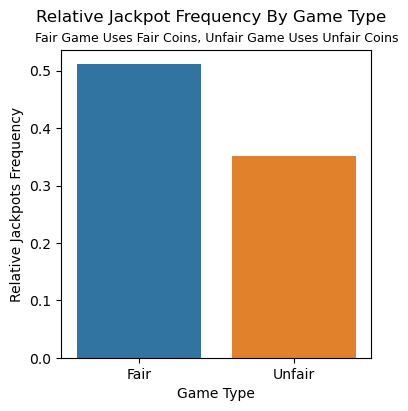

In [15]:
cointype= ['Fair', 'Unfair']
Jackpots= [rel_fairjackpots, rel_unfairjackpots]

plt.figure(figsize=(4, 4))
sns.barplot(x=cointype, y=Jackpots)
plt.ylabel('Relative Jackpots Frequency')
plt.xlabel('Game Type')
plt.suptitle('Relative Jackpot Frequency By Game Type')
plt.title('Fair Game Uses Fair Coins, Unfair Game Uses Unfair Coins', fontsize=9)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [16]:
fairdie = m.Die()
unfair6 = m.Die()
unfair1 = m.Die()

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [17]:
unfair6.change_side_weight(6, 5)
unfair6.current_state()

,weight
face,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [18]:
unfair1.change_side_weight(1, 5)
unfair1.current_state()

,weight
face,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [19]:
fairgame = m.Game([fairdie, fairdie, fairdie, fairdie, fairdie])
fairgame.play(10000)
fairgame.show_results()

,1,2,3,4,5
roll,,,,,
1,3,2,1,5,1
2,3,1,5,1,6
3,3,6,6,4,5
4,5,4,2,5,1
5,6,6,2,4,3
...,...,...,...,...,...
9996,3,4,1,3,6
9997,5,1,6,4,2
9998,1,2,2,4,3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
unfairgame = m.Game([unfair6, unfair1, fairdie, fairdie, fairdie])
unfairgame.play(10000)
unfairgame.show_results()

,1,2,3,4,5
roll,,,,,
1,6,3,6,6,1
2,6,6,6,2,2
3,4,1,4,3,3
4,3,4,1,4,6
5,6,5,4,4,2
...,...,...,...,...,...
9996,4,1,4,4,3
9997,6,3,2,1,5
9998,6,1,5,4,1


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [21]:
fairanalysis = m.Analyzer(fairgame)
unfairanalysis = m.Analyzer(unfairgame)

In [22]:
rel_fairjackpots = fairanalysis.jackpot()/10000
rel_unfairjackpots = unfairanalysis.jackpot()/10000

Text(0.5, 1.0, 'Fair Game Uses Fair Dice, Unfair Game Uses Unfair Dice')

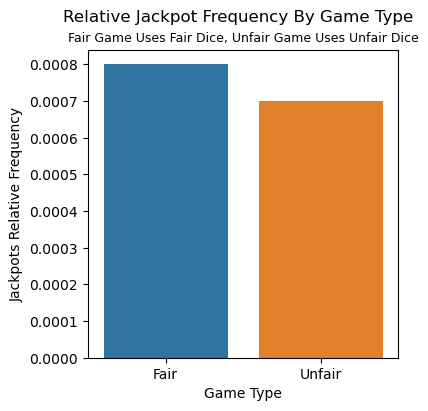

In [23]:
dietype= ['Fair', 'Unfair']
Jackpots= [rel_fairjackpots, rel_unfairjackpots]

plt.figure(figsize=(4, 4))
sns.barplot(x=dietype, y=Jackpots)
plt.ylabel('Jackpots Relative Frequency')
plt.xlabel('Game Type')
plt.suptitle('Relative Jackpot Frequency By Game Type')
plt.title('Fair Game Uses Fair Dice, Unfair Game Uses Unfair Dice', fontsize=9)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [24]:
letters = pd.read_csv('english_letters.txt', header=None, sep=' ')\
            .rename({0:'letter', 1:'freq'}, axis=1)

alphabet = m.Die(np.array(letters['letter']))

for n in range(len(letters)):
    alphabet.change_side_weight(letters.letter[n], letters.freq[n].item())

alphabet.current_state()

,weight
face,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [25]:
wordgame4 = m.Game([alphabet,alphabet,alphabet,alphabet])
wordgame4.play(1000)
wordgame4.show_results()

,1,2,3,4
roll,,,,
1,E,L,T,N
2,D,E,T,O
3,P,E,D,A
4,E,E,W,O
5,E,I,O,A
...,...,...,...,...
996,V,B,I,I
997,H,V,R,A
998,B,F,E,O


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [26]:
wordanalysis = m.Analyzer(wordgame4)
fourletterwords = wordanalysis.permutation_count()
fourletterwords = fourletterwords.index.map(''.join).to_frame().rename({0:'perm'}, axis=1)
fourletterwords

,perm
AADU,AADU
AAIU,AAIU
AANE,AANE
AATA,AATA
AATC,AATC
...,...
YRTF,YRTF
YSER,YSER
YSHK,YSHK
YTEI,YTEI


In [27]:
scrabble = pd.read_csv('scrabble_words.txt', header=None)\
            .rename({0:'word'}, axis=1)

In [28]:
words4l = fourletterwords.perm.isin(scrabble.word).astype(int).sum()
words4l 

58

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [29]:
wordgame5 = m.Game([alphabet,alphabet,alphabet,alphabet,alphabet])
wordgame5.play(1000)
wordgame5.show_results()

,1,2,3,4,5
roll,,,,,
1,O,T,P,M,A
2,R,R,I,U,I
3,H,E,Y,B,N
4,Y,R,N,T,P
5,E,N,E,Q,L
...,...,...,...,...,...
996,D,A,E,A,O
997,T,F,T,H,A
998,T,G,O,Y,M


In [30]:
wordanalysis = m.Analyzer(wordgame5)
fiveletterwords = wordanalysis.permutation_count()
fiveletterwords = fiveletterwords.index.map(''.join).to_frame().rename({0:'perm'}, axis=1)
fiveletterwords

,perm
AABET,AABET
AAGET,AAGET
AAHMT,AAHMT
AANNA,AANNA
AARMI,AARMI
...,...
YSFHE,YSFHE
YTEUT,YTEUT
YTTUR,YTTUR
ZFVIA,ZFVIA


In [31]:
words5l = fiveletterwords.perm.isin(scrabble.word).astype(int).sum()
words5l

6

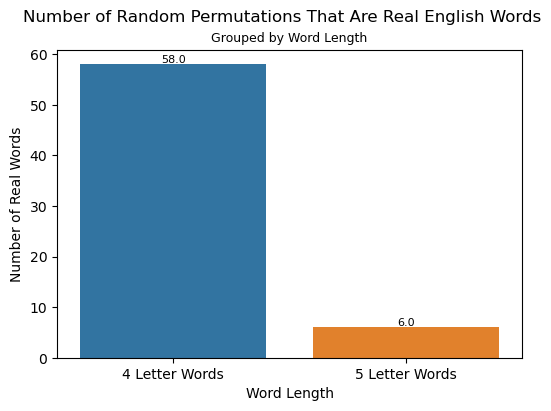

In [32]:
wordtype= ['4 Letter Words', '5 Letter Words']
count= [words4l, words5l]

plt.figure(figsize=(6, 4))
myplot= sns.barplot(x=wordtype, y=count)
plt.ylabel('Number of Real Words')
plt.xlabel('Word Length')
plt.suptitle('Number of Random Permutations That Are Real English Words')
plt.title('Grouped by Word Length', fontsize=9)
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(ycoor), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=8)

The four letter word length generates more actual English words than the five letter word length.

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.